In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
path = r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\metrics for alignment\stimulus responsiveness\667252_2023-09-25_0_day_1_probeF_stim_modulation.csv"
df_metrics = pd.read_csv(path)

In [14]:
df_metrics.columns

Index(['unit_id', 'session_id', 'experiment_day', 'project', 'probe',
       'peak_channel', 'firing_rate', 'peak_to_valley', 'peak_trough_ratio',
       'repolarization_slope', 'recovery_slope', 'spread', 'velocity_above',
       'velocity_below', 'snr', 'amplitude_cutoff', 'amplitude_cv_median',
       'amplitude_cv_range', 'amplitude_median', 'drift_ptp', 'drift_std',
       'drift_mad', 'firing_range', 'isi_violations_ratio',
       'isi_violations_count', 'presence_ratio', 'rp_contamination',
       'rp_violations', 'sliding_rp_violation', 'sync_spike_2', 'sync_spike_4',
       'sync_spike_8', 'd_prime', 'isolation_distance', 'l_ratio',
       'silhouette', 'nn_hit_rate', 'nn_miss_rate', 'exp_decay', 'half_width',
       'num_negative_peaks', 'num_positive_peaks', 'visual_response',
       'auditory_response', 'visual_discrim', 'auditory_discrim',
       'lick_modulation', 'wf_PC1', 'wf_PC2', 'wf_PC3'],
      dtype='object')

In [15]:
density = df_metrics['peak_channel'].value_counts()
peak_channels = df_metrics['peak_channel'].tolist()

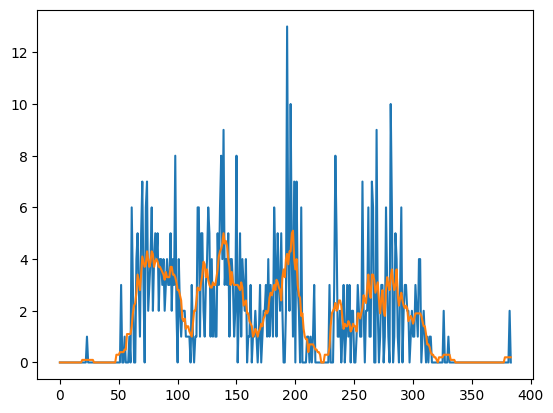

In [16]:
unit_density = []

for i in range(384):
    if i in peak_channels:
        count = density.loc[i]
    else:
        count = 0
    
    unit_density.append(count)

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(unit_density, kernel, mode='same')

plt.plot(unit_density)
plt.plot(data_convolved)

In [17]:
def channelwise_median(metricsdf, metric, smooth_kernel=5):

    channelwise_median = []
    channelwise_count = []
    for i in range(384):

        channeldata = metricsdf[metricsdf['peak_channel'].isin(np.arange(i-smooth_kernel, i+smooth_kernel+1))]
        if len(channeldata)<5:
            channelwise_median.append(np.nan)
        else:
            channelwise_median.append(np.nanmedian(channeldata[metric]))
        channelwise_count.append(len(channeldata))

    return channelwise_median, np.array(channelwise_count)

In [18]:
len(channelwise_median(df_metrics, 'firing_rate'))

2

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0238519791367993, 0.0238519791367993, 0.1318135689138913, 0.4783646926880321, 0.4783646926880321, 0.4783646926880321, 0.23531163043146525, 0.4258484930096405, 0.37493637379951317, 0.4258484930096405, 0.39711452983899326, 0.368380566668346, 0.3462024106288659, 0.3462024106288659, 0.4258484930096405, 0.4432841502733827, 0.4483753621943954, 0.49733468779098366, 0.5455268444679673, 0.5891857302563778, 0.5891857302563778, 0.5571041208910921, 0.5455268444679673, 0.480735942075901, 0.480735942075901, 0.480735942075901, 0.5173508223297598, 0.5891857302563778, 0.5410633162084493, 0.5339495680448424, 0.480735942075901, 0.48296770620566, 0.4651833357966429, 0.4607198075371249, 0.4629515716668839, 0.5007520766146771, 0.4506071263241544, 0.445864627548416

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.03,
       0.03, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.11, 0.14, 0.14, 0.14,
       0.18, 0.23, 0.26, 0.27, 0.32, 0.39, 0.42, 0.42, 0.45, 0.52, 0.54,
       0.56, 0.6 , 0.66, 0.68, 0.71, 0.76, 0.74, 0.76, 0.78, 0.82, 0.82,
       0.8 , 0.81, 0.82, 0.8 , 0.77, 0.77, 0.8 , 0.79, 0.74, 0.76, 0.76,
       0.8 , 0.76, 0.74, 0.74, 0.71, 0.68, 0.65, 0.65, 0.63, 0.6 , 0.58,
       0.55, 0.54, 0.51, 0.5 , 0.48, 0.45, 0.41, 0.4 , 0.42, 0.45, 0.38,
       0.41, 0.46, 0.44, 0.43, 0.45, 0.47, 0.51, 0.54, 0.54, 0.57, 0.57,
       0.59, 0.6 , 0.58, 0.62, 0.65, 0.7 , 0.77, 0.75, 0.78, 0.8 , 0.79,
       0.77, 0.8 , 0.8 , 0.81, 0.81, 0.78, 0.74, 0.75, 0.79, 0.78, 0.77,
       0.81, 0.81, 0.8 , 0.8 , 0.76, 0.72, 0.68, 0.

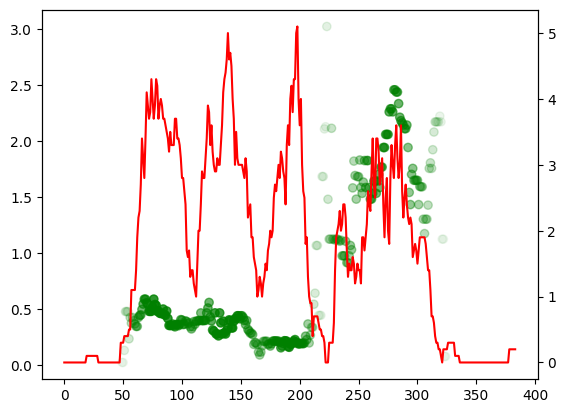

In [19]:
metric = 'firing_rate'
df_metric, df_counts = channelwise_median(df_metrics, metric, smooth_kernel=10)
df_counts = df_counts/100
df_counts[df_counts>1] = 1
print(df_metric)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(data_convolved, 'red')
#ax.plot(df_metrics['peak_channel'], df_metrics[metric], 'k.', alpha=0.3)
ax.scatter(np.arange(384), df_metric, color='g', alpha=df_counts)
df_counts

In [161]:
task_correlation_plot = r"\\allen\programs\mindscope\workgroups\np-behavior\tissuecyte\674562\image_plots\A2_corr_task.pickle"
full_correlation_plot = r"\\allen\programs\mindscope\workgroups\np-behavior\tissuecyte\674562\image_plots\A2_corr.pickle"

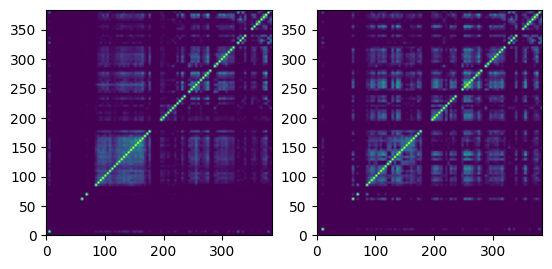

In [162]:
task_correlation_data = pd.read_pickle(task_correlation_plot)
full_correlation_data = pd.read_pickle(full_correlation_plot)

rot = np.rot90(np.rot90(task_correlation_data['img']))
flip = np.flipud(rot)

rot_full = np.rot90(np.rot90(full_correlation_data['img']))
flip_full = np.flipud(rot_full)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(flip, extent=[0, 384, 0, 384])
ax[1].imshow(flip_full, extent=[0, 384, 0, 384])
